# Exploration of Nissan files with preliminary setup

In [3]:
import strym as s
from strym import strymread
from strym import strymmap
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ntpath

In [2]:
dbcfile = 'DBC/nissan_x_trail_2017.dbc'

In [174]:
db = s.initializeDBC_Cantools(dbcfile)
# d5 = s.convertData(438,'UNKNOWN1',data, db)

In [120]:
brake = s.convertData(438,'INVERTED_UNKNOWN1',data, db)

In [169]:
# gas = s.convertData(348, 'GAS_PEDAL_RAW',data,db)
# ugas = s.convertData(348, 'GAS_PEDAL',data,db)

# gas3 = s.convertData(348, 'GAS_PEDAL_RAW',data3,db)
gas2 = s.convertData(348, 'GAS_PEDAL_RAW',data2,db)
ugas2 = s.convertData(348, 'GAS_PEDAL',data2,db)

In [176]:
brake_pressed = s.convertData(523,'USER_BRAKE_PRESSED')
# steer = s.convertData(2,'STEER_ANGLE',data2,db)
# gear = s.convertData(1055,'GEAR_SHIFTER',data2,db)

In [180]:
int(gear.loc[
    gear.Message != 0
].head(1).Time)

1636585239

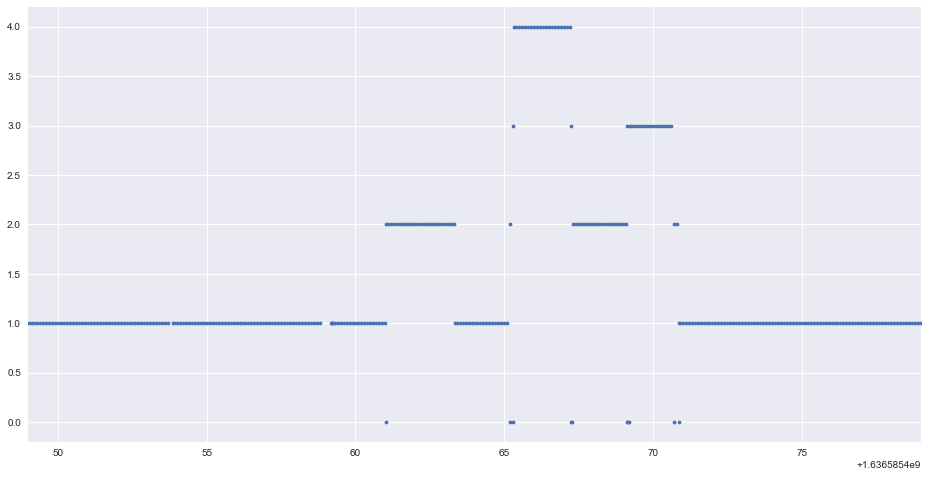

In [187]:
# plt.plot(steer.Time,steer.Message)
plt.xlim([1636585239+210,1636585239+240])
plt.plot(gear.Time,gear.Message,ls='',marker='.')

In [6]:
folder = '/Users/mnice/Downloads/libpanda/2021_11_10/'
# ended with disconnection upon driving away
drive1 = folder + '2021-11-10-21-53-25_JN1BJ1CW3LW375199_CAN_Messages.csv'
# ended with a drive failure
drive2 = folder + '2021-11-10-22-42-27_JN1BJ1CW3LW375199_CAN_Messages.csv'
# ended with a drive failure
drive3 = folder + '2021-11-10-23-20-51_JN1BJ1CW3LW375199_CAN_Messages.csv'
# very short, likely just before the reboot with new hostname
drive4 = folder + '2021-11-10-23-50-55_JN1BJ1CW3LW375199_CAN_Messages.csv'
# completed the drive around the city
drive5 = folder + '2021-11-10-23-51-25_JN1BJ1CW3LW375199_CAN_Messages.csv'

In [159]:
drive6 = '/Users/mnice/Downloads/libpanda/2021_11_11/2021-11-11-23-18-38_JN1BJ1CW3LW375199_CAN_Messages.csv'

In [160]:
data6 = pd.read_csv(drive6)

In [7]:
data = pd.read_csv(drive5)


In [148]:
data3 = pd.read_csv(drive3)

In [153]:
data2 = pd.read_csv(drive2)

In [71]:
# d5 = strymread(drive5,dbcfile=dbcfile)


In [13]:
speed = s.convertData(645,'WHEEL_SPEED_RR', data,db)

In [20]:
int(d5.loc[
    d5.Message != 0
].head(1).Time)

1636588508

In [21]:
t0 = 1636588508

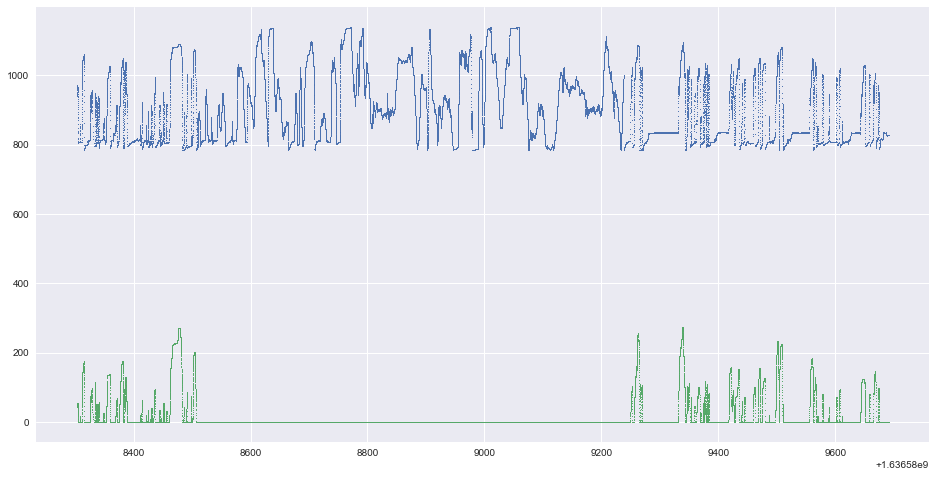

In [131]:
plt.plot(gas.Time,gas.Message, ls='',marker='.',markersize = 2)
plt.plot(ugas.Time,ugas.Message, ls='',marker='.',markersize = 2)

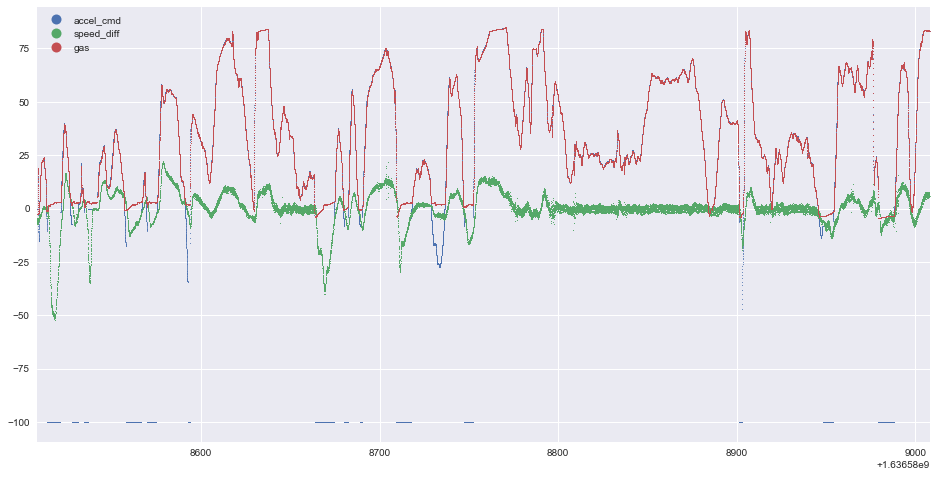

In [157]:
plt.xlim([t0,t0+500])
# plt.ylim([-2,40])
plt.plot(d5.Time,d5.Message, ls='',marker='.',markersize = 2,label='accel_cmd')
# plt.figure()
# plt.plot(speed.Time,speed.Message,ls='',marker='.')
plt.plot(speed.Time,speed.Message.diff().rolling(window=100).mean()*500,ls='',marker='.',markersize = 2,label='speed_diff')

plt.plot(gas.Time,(gas.Message-800)/4, ls='',marker='.',markersize = 2, label='gas')
plt.legend(markerscale=10)
# plt.plot(brake.Time,brake.Message,ls='',marker='.',markersize = 2)


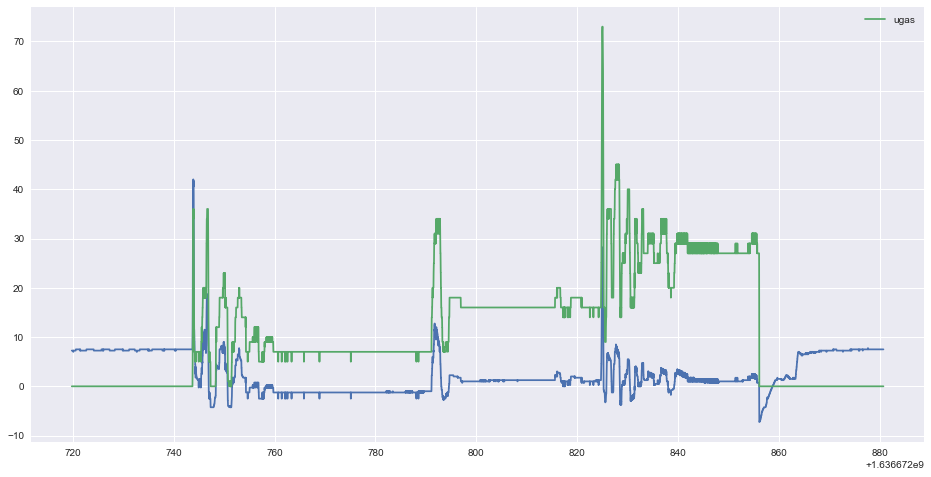

In [168]:
plt.plot(gas2.Time,(gas2.Message-800)/4)
plt.plot(ugas2.Time,ugas2.Message, label='ugas')
plt.legend()

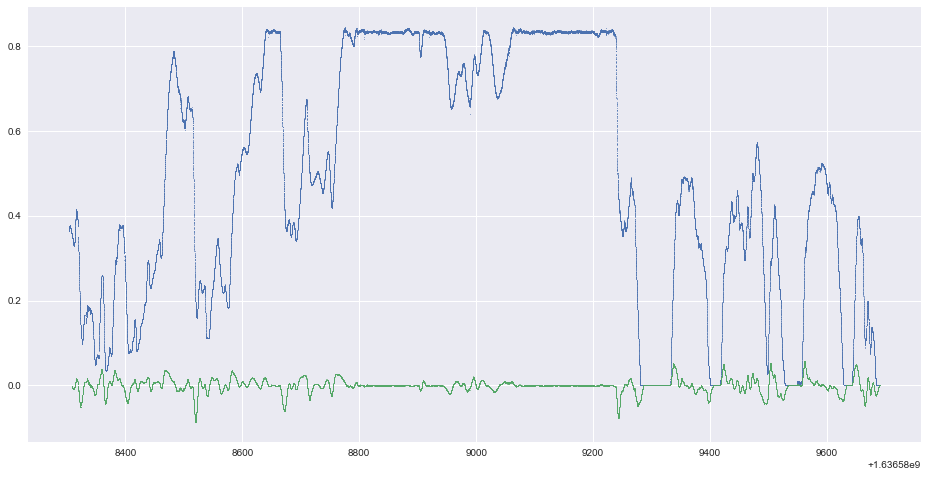

In [35]:
plt.plot(speed.Time,speed.Message/100,ls='',marker='.', markersize = 1)
plt.plot(speed.Time,speed.Message.diff().rolling(window=500).mean(),ls='',marker='.',markersize = 1)

/Users/sprinkle/opt/anaconda3/lib/python3.8/site-packages/strym/strymread.py:605: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



,MessageID,Counts_Bus_0,Counts_Bus_1,Counts_Bus_2,TotalCount
2,2,138386,138387,138386,415159
42,42,13836,0,13836,27672
346,346,135216,0,135216,270432
347,347,135214,0,135216,270430
348,348,135215,0,135215,270430
...,...,...,...,...,...
1401,1401,13838,0,13838,27676
1474,1474,2767,0,2767,5534
1497,1497,13793,0,13793,27586
1514,1514,2768,2768,2768,8304


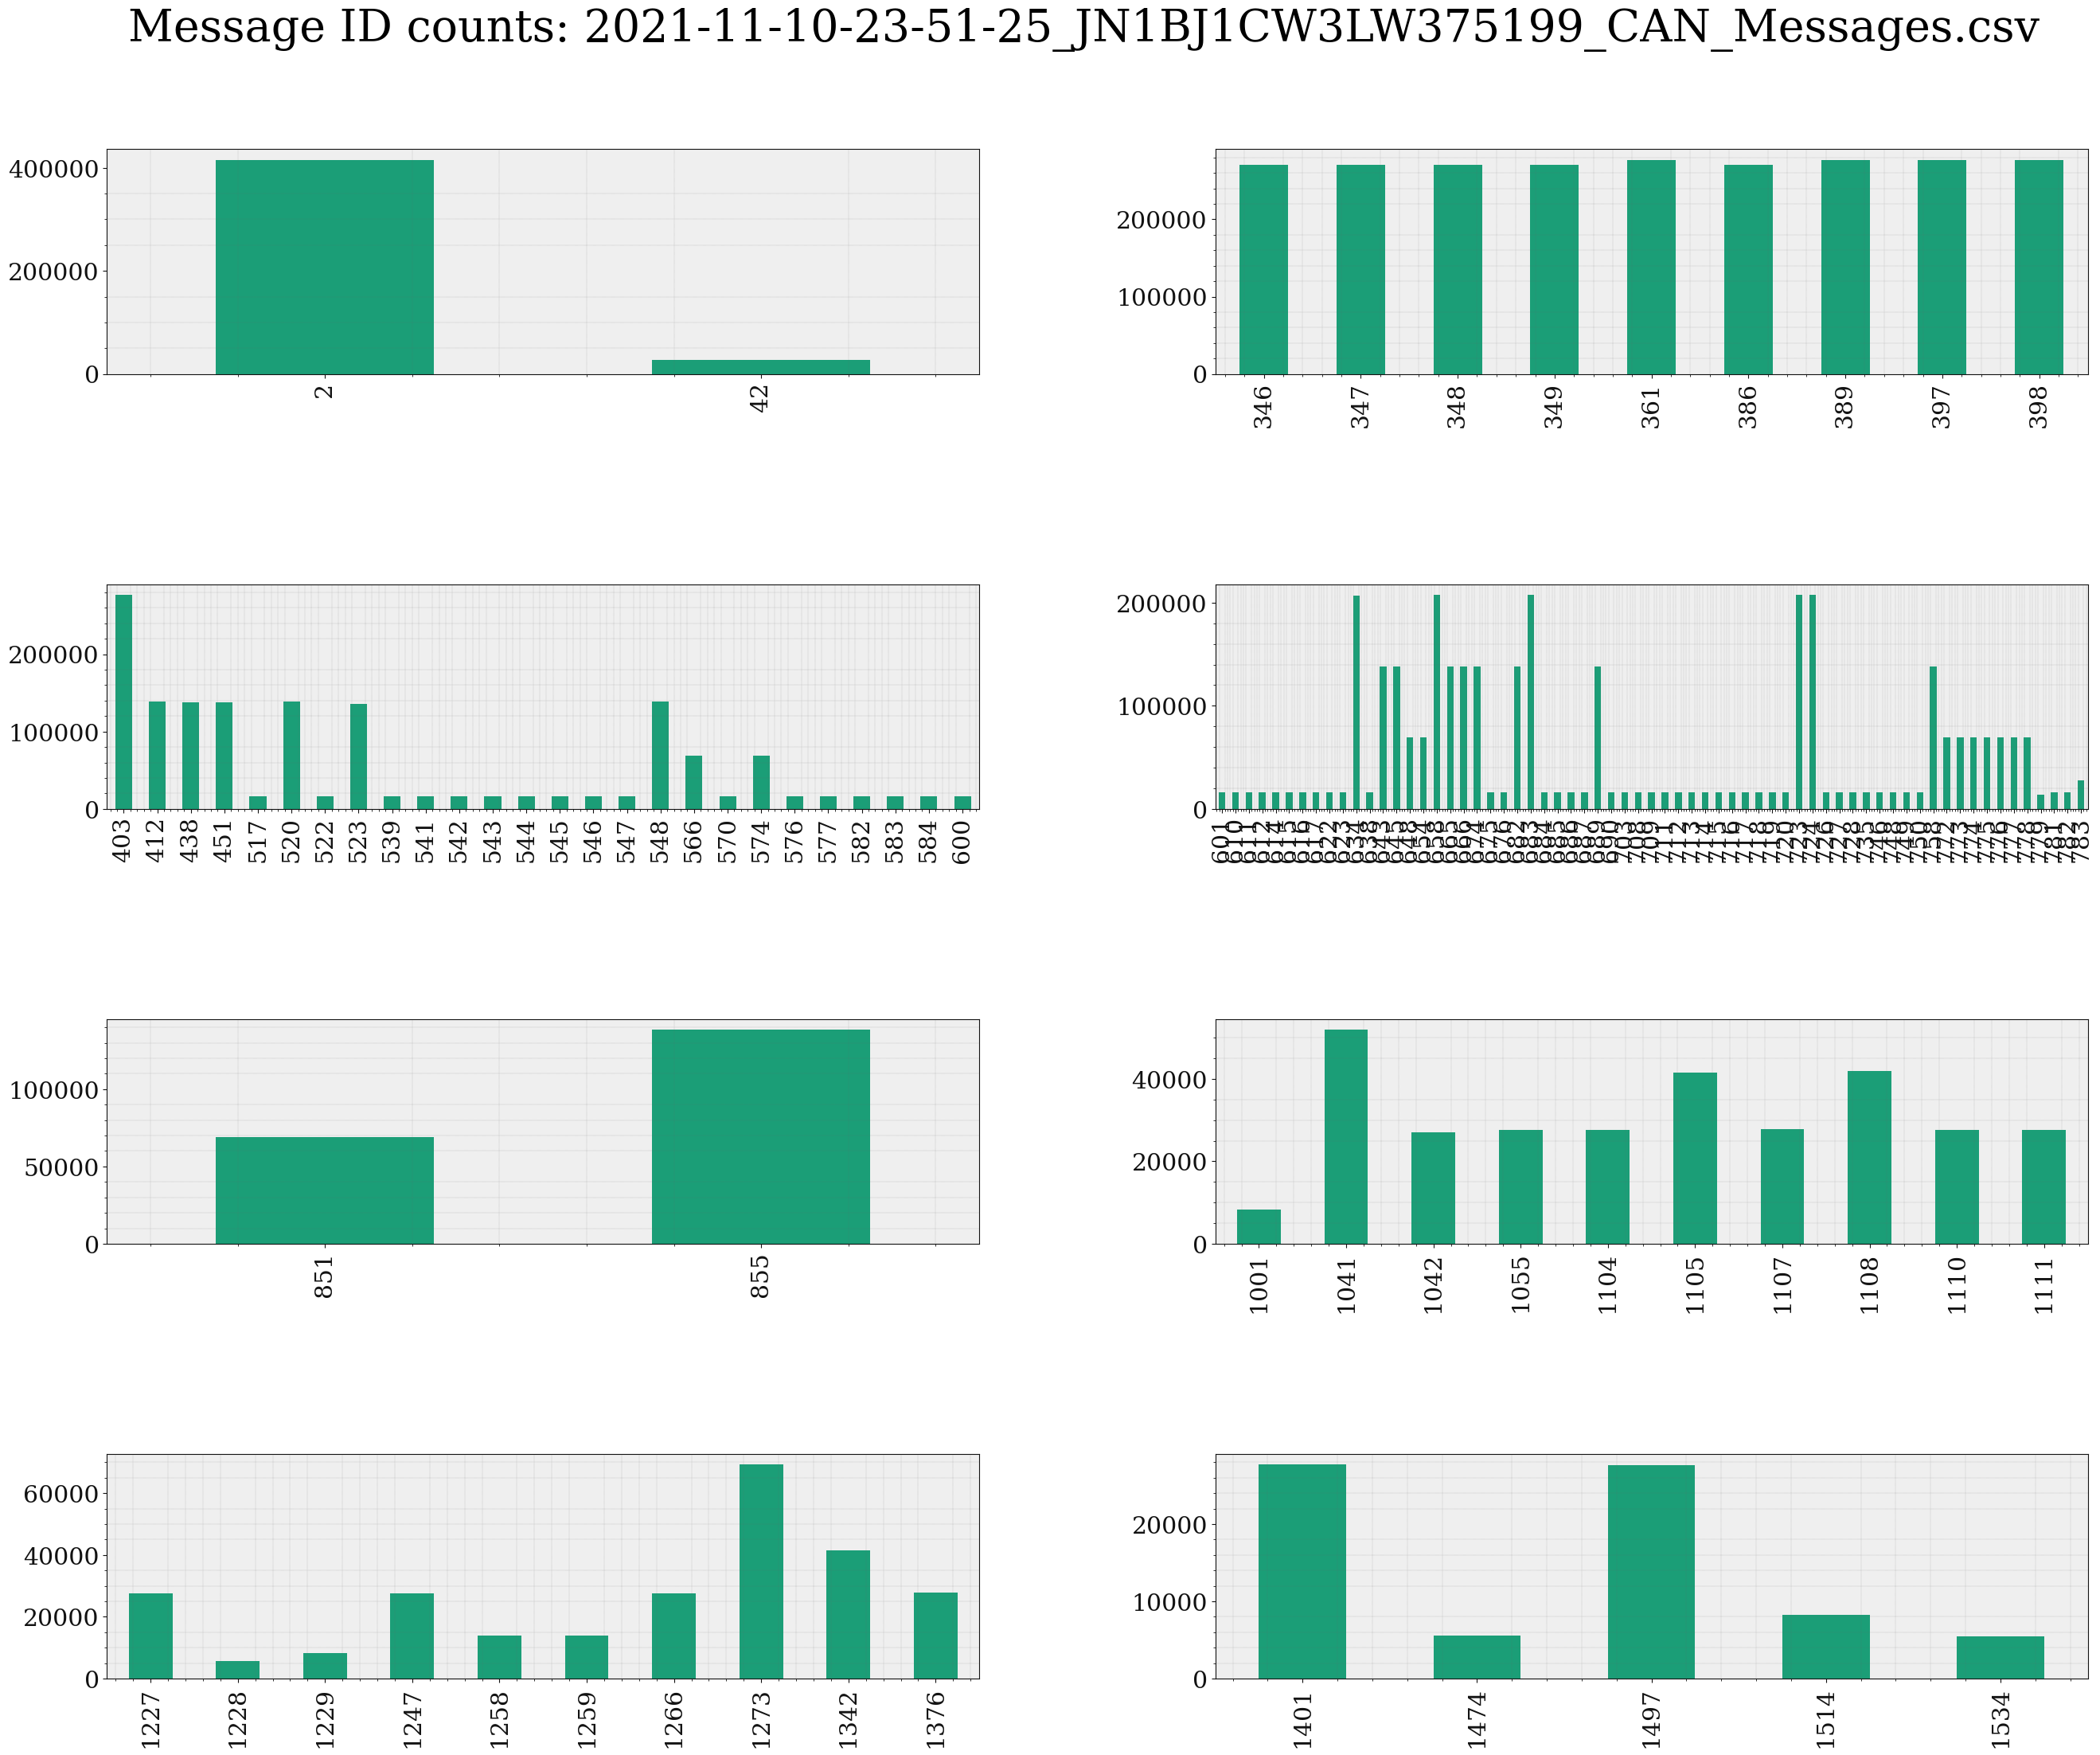

In [5]:
# let's look at all the data from this file:
d5.count(plot=True)

In [6]:
speed_rear_wheels = d5.get_ts('WHEEL_SPEEDS_REAR','WHEEL_SPEED_RR')
speed_hud_mph = d5.get_ts('HUD','SPEED_MPH')

In [7]:
gas_pedal = d5.get_ts('CRUISE_THROTTLE','GAS_PEDAL')
pro_pilot_cruise_on = d5.get_ts('PRO_PILOT','CRUISE_ON')
pro_pilot_cruise_activated = d5.get_ts('PRO_PILOT','CRUISE_ACTIVATED')
set_speed = d5.get_ts('PROPILOT_HUD','SET_SPEED')

In [8]:
# derivative of the speed
rear_wheel_accel_approx = strymread.differentiate(speed_rear_wheels)

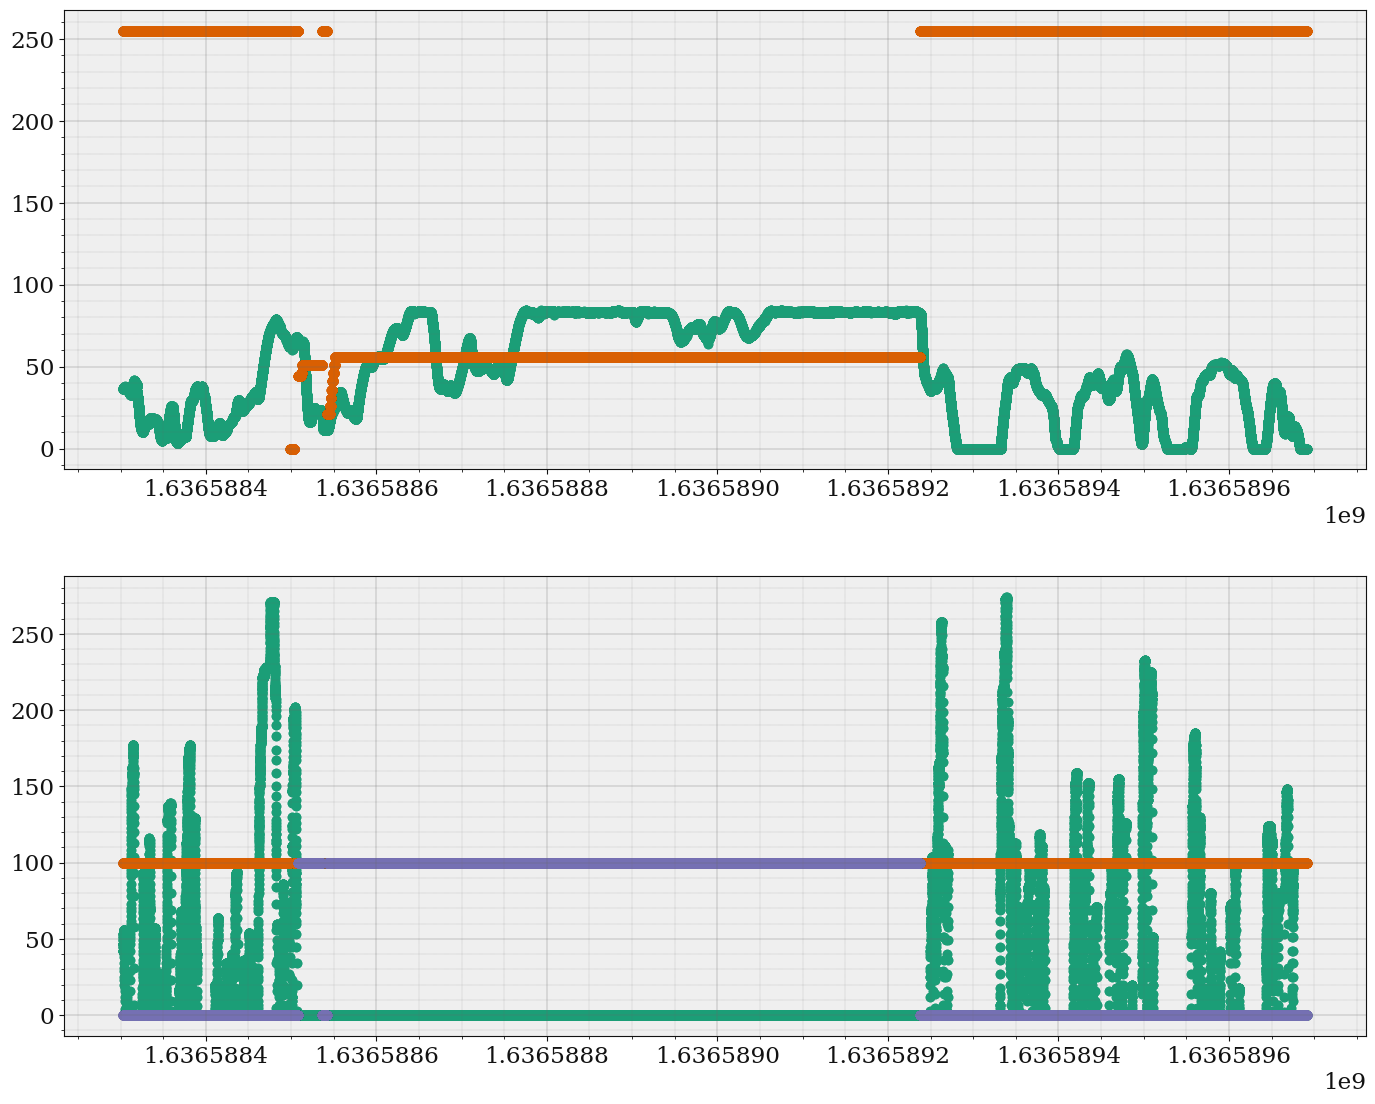

In [9]:
fig, ax = strymread.create_fig(2)
ax[0].scatter(x = speed_rear_wheels['Time'], y = speed_rear_wheels['Message'],label='Rear wheel RR speed')
ax[0].scatter(x = set_speed['Time'], y = set_speed['Message'],label='set_speed')

ax[1].scatter(x= gas_pedal['Time'], y = gas_pedal['Message'], label = 'Gas Pedal')
ax[1].scatter(x=pro_pilot_cruise_on['Time'], y = pro_pilot_cruise_on['Message'] * 100, label = 'Cruise On')
ax[1].scatter(x=pro_pilot_cruise_activated['Time'], y = pro_pilot_cruise_activated['Message'] * 100, label = 'Cruise Activated')

## Some numbers to look at that may be promising:

### 523 - Cruise Throttle

Contains this information:
```
BO_ 523 CRUISE_THROTTLE: 6 XXX
 SG_ PROPILOT_BUTTON : 8|1@0+ (1,0) [0|1] "" XXX
 SG_ CANCEL_BUTTON : 9|1@0+ (1,0) [0|1] "" XXX
 SG_ GAS_PEDAL_INVERTED : 37|10@0+ (1,0) [0|1023] "" XXX
 SG_ SET_BUTTON : 11|1@0+ (1,0) [0|1] "" XXX
 SG_ RES_BUTTON : 12|1@0+ (1,0) [0|1] "" XXX
 SG_ FOLLOW_DISTANCE_BUTTON : 10|1@0+ (1,0) [0|1] "" XXX
 SG_ NO_BUTTON_PRESSED : 13|1@0+ (1,0) [0|1] "" XXX
 SG_ GAS_PEDAL : 31|10@0+ (1,0) [0|255] "" XXX
 SG_ USER_BRAKE_PRESSED : 21|1@0+ (1,0) [0|1] "" XXX
 SG_ USER_BRAKE_PRESSED_INVERTED : 22|1@0+ (1,0) [0|3] "" XXX
 SG_ NEW_SIGNAL_2 : 23|1@0+ (1,0) [0|1] "" XXX
 SG_ GAS_PRESSED_INVERTED : 20|1@0+ (1,0) [0|255] "" XXX
 SG_ COUNTER : 17|2@0+ (1,0) [0|3] "" XXX
 SG_ unsure1 : 7|10@0+ (1,0) [0|1023] "" XXX
 SG_ unsure2 : 43|4@0+ (1,0) [0|1] "" XXX
 SG_ unsure3 : 19|2@0+ (1,0) [0|3] "" XXX
```

### 438 - PRO_PILOT
Lots of space not used in the decoder yet
```
BO_ 438 PRO_PILOT: 8 XXX
 SG_ COUNTER : 55|4@0+ (1,0) [0|255] "" XXX
 SG_ SET_ME_X03 : 33|2@0+ (1,0) [0|15] "" XXX
 SG_ CRUISE_ACTIVATED : 38|1@0+ (1,0) [0|3] "" XXX
 SG_ CRUISE_ON : 36|1@0+ (1,0) [0|255] "" XXX
 SG_ STEER_STATUS : 51|1@0+ (1,0) [0|3] "" XXX
```

## Current control clearly done through the LKAS module

The LKAS messages are able to control steering angle and torque through this message type:

```
BO_ 361 LKAS: 8 XXX
 SG_ MAX_TORQUE : 39|8@0+ (0.01,0) [0|255] "Nm" XXX
 SG_ SET_0x80 : 47|8@0+ (1,0) [0|255] "" XXX
 SG_ LKA_ACTIVE : 52|1@0+ (1,0) [0|15] "" XXX
 SG_ SET_0x80_2 : 31|8@0+ (1,0) [0|255] "" XXX
 SG_ COUNTER : 51|4@0+ (1,0) [0|15] "" XXX
 SG_ DESIRED_ANGLE : 7|18@0+ (-0.01,1310) [0|255] "" XXX
 SG_ CHECKSUM : 63|8@0+ (1,0) [0|255] "" XXX

BO_ 389 STEER_TORQUE_SENSOR: 8 XXX
 SG_ LKAS_ACTIVE : 37|1@0+ (1,0) [0|3] "" XXX
 SG_ STEER_TORQUE_LKAS : 47|8@0+ (1,0) [0|255] "" XXX
 SG_ STEER_ANGLE : 23|18@0+ (-0.01,1310) [0|262143] "" XXX
 SG_ STEER_TORQUE_DRIVER : 7|12@0+ (-0.01,20.47) [0|4095] "Nm" XXX
 SG_ COUNTER : 51|4@0+ (1,0) [0|15] "" XXX
 SG_ CHECKSUM : 63|8@0+ (1,0) [0|127] "" XXX
```

Looking at msg 346, there is a clear shift when cruise goes active.

In [10]:
# looking at 346 as one single big giant number
d5 = strymread(drive5,dbcfile=dbcfile)
unknown_1 = d5.get_ts('UNKNOWN_346','UNKNOWN_1')

[2021_11_11_15_43_47] (root) INFO: Vehicle model infered is nissan-rogue sport-2020


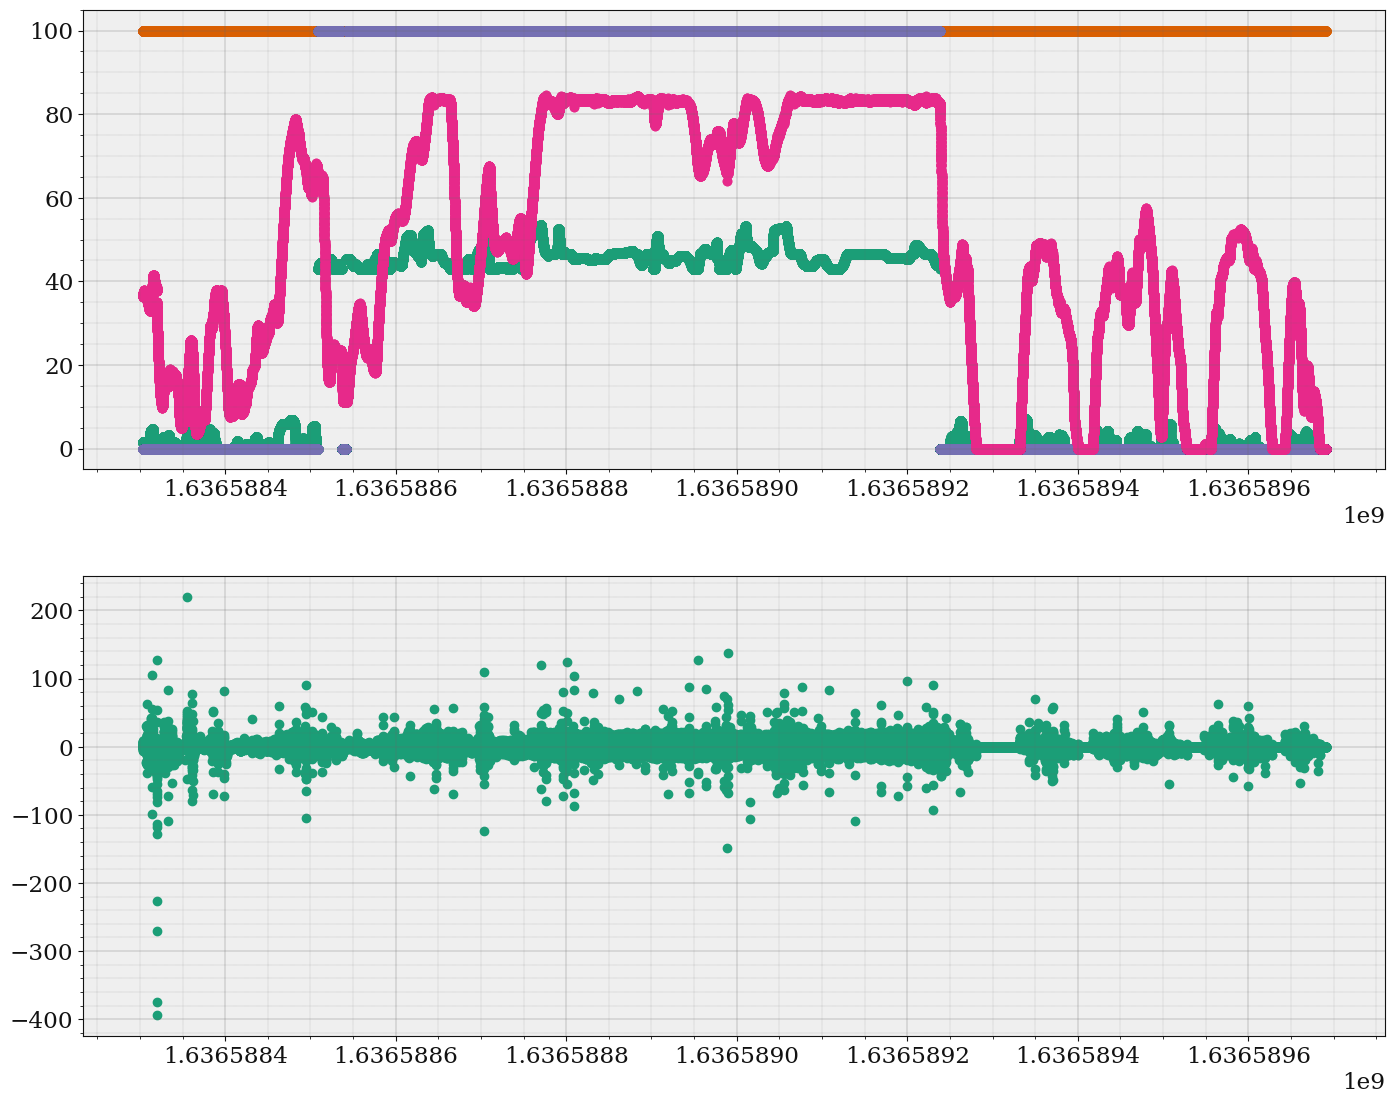

In [11]:
fig,ax = strymread.create_fig(2)
ax[0].scatter( x = unknown_1['Time'], y = unknown_1['Message']/100000000, label = 'Unknown, unknowns' )
ax[0].scatter(x=pro_pilot_cruise_on['Time'], y = pro_pilot_cruise_on['Message'] * 100 , label = 'Cruise On')
ax[0].scatter(x=pro_pilot_cruise_activated['Time'], y = pro_pilot_cruise_activated['Message'] * 100, label = 'Cruise Activated')
ax[0].scatter(x = speed_rear_wheels['Time'], y = speed_rear_wheels['Message'],label='Rear wheel RR speed')
ax[1].scatter(x = rear_wheel_accel_approx['Time'], y = rear_wheel_accel_approx['Message'])



In [12]:
# seems to have only a few active bits, and the high order bits go to 0 when in ACC mode
cruise_throttle_unknown1 = d5.get_ts('CRUISE_THROTTLE','unsure1')

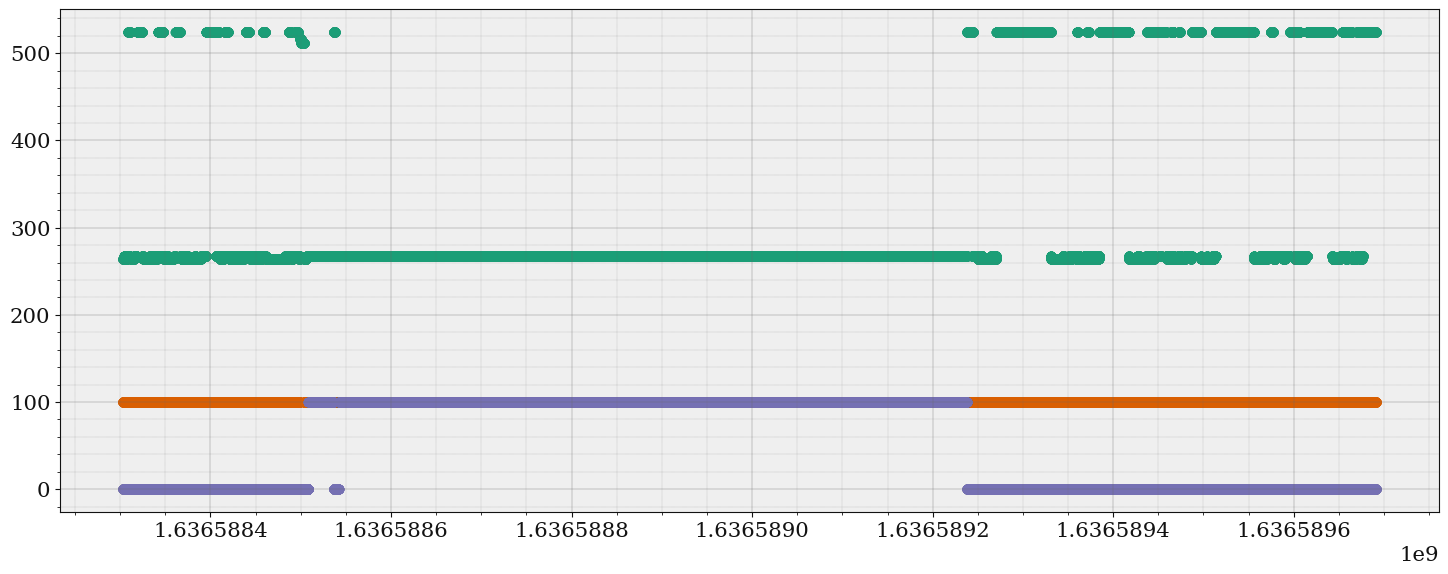

In [13]:
fig,ax = strymread.create_fig(1)
ax[0].scatter(x=cruise_throttle_unknown1['Time'], y = cruise_throttle_unknown1['Message'], label = 'Unknown 1 (Cruise Throttle)')
ax[0].scatter(x=pro_pilot_cruise_on['Time'], y = pro_pilot_cruise_on['Message'] * 100 , label = 'Cruise On')
ax[0].scatter(x=pro_pilot_cruise_activated['Time'], y = pro_pilot_cruise_activated['Message'] * 100, label = 'Cruise Activated')



In [14]:
# 438
d5 = strymread(drive5,dbcfile=dbcfile)
pro_pilot_unknown1 = d5.get_ts('PRO_PILOT','UNKNOWN1')

[2021_11_11_15_44_23] (root) INFO: Vehicle model infered is nissan-rogue sport-2020


In [15]:
lead_car = d5.get_ts('PROPILOT_HUD','LEAD_CAR')

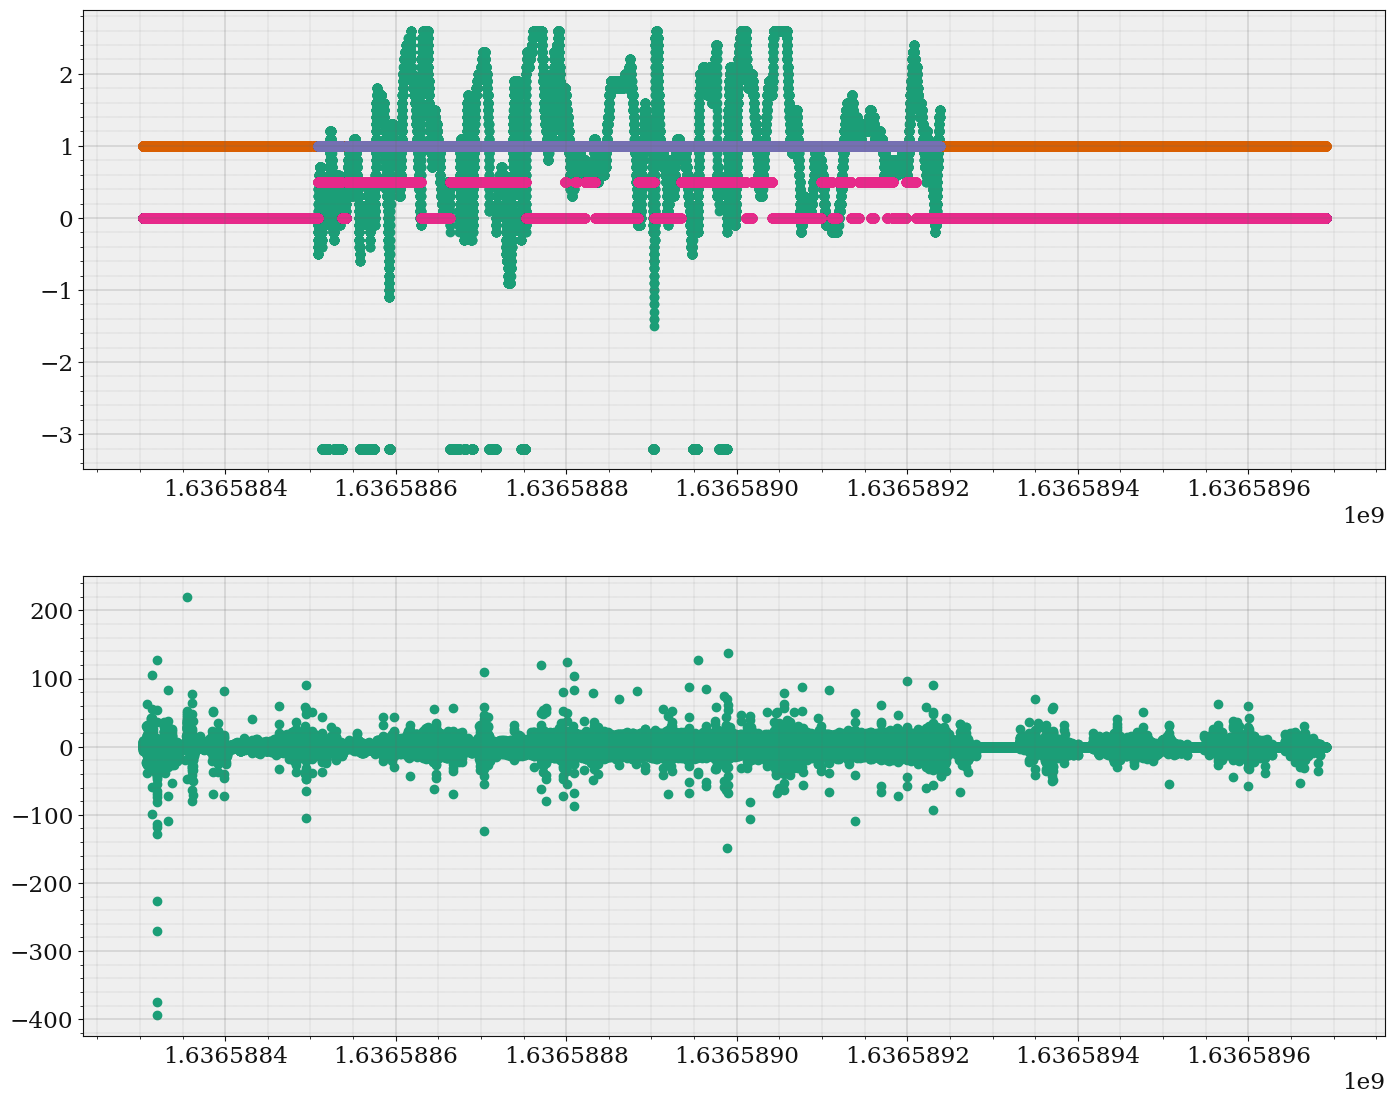

In [16]:
fig,ax = strymread.create_fig(2)
ax[0].scatter(x=pro_pilot_unknown1['Time'], y = pro_pilot_unknown1['Message'], label = 'Unknown 1 (PRO_PILOT)')
ax[0].scatter(x=pro_pilot_cruise_on['Time'], y = pro_pilot_cruise_on['Message']  , label = 'Cruise On')
ax[0].scatter(x=pro_pilot_cruise_activated['Time'], y = pro_pilot_cruise_activated['Message'] , label = 'Cruise Activated')
ax[0].scatter(x=lead_car['Time'], y = lead_car['Message']*0.5, label = 'Lead Car')
ax[1].scatter(x=rear_wheel_accel_approx['Time'], y = rear_wheel_accel_approx['Message'], label = 'Maybe accel')